In [1]:
# 회귀모형 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

# 쓸데없는 알림 방지
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [29]:
rawData = pd.read_csv('C:/Users/scien/Videos/toyota/ToyotaCorolla.csv')

In [3]:
rawData.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [30]:
rawData[['Disel', 'Petrol']] = pd.get_dummies(rawData.Fuel_Type, drop_first=True)

In [31]:
rawData.drop(columns=['Id', 'Model', 'Fuel_Type'], inplace=True)

In [32]:
rawData

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Disel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,1,0,0,0,1,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,1,0,1,1,1,0,0,0,0,1
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,1,0,0,1,1,0,0,0,0,1
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,1,0,0,0,1,0,0,0,0,1
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,1,0,0,0,0,1


In [35]:
rawData.iloc[:,0]

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

## 가격에 영향을 주는 부품은 무엇인지 모델을 만들기 

#### 아무리 Fuel을 빼고싶어도 열에서 안빠지는 바람에 앞부분 열을 버리고 시작했습니다.

- 이럴 땐 Inplace 옵션을 제외하고 drop 특정 컬럼을 넣어놓고 지운 다음 새로운 데이터 프레임을 만든다 

In [36]:
# 현 데이터는 시계열 데이터가 아니기 때문에 현 식을 이용하여 사용한다
y = rawData.iloc[:,0]
x = rawData.iloc[:,3:]


train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [37]:
train_model1 = sm.OLS(train_y, train_x).fit()

In [38]:
train_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     379.8
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:24:52   Log-Likelihood:                -9645.3
No. Observations:                1148   AIC:                         1.936e+04
Df Residuals:                    1115   BIC:                         1.952e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1367.0539     44.097     31.001      0.000    1280.531    1453.576
KM                  -0.0160      0.001    -12.875      0.000      -0.018      -0.014
HP                  14.0161      3.496      4.009      0.000       7.157      20.875
Met_Color          -13.1034     74.266     -0.176      0.860    -158.820     132.613
Automatic          102.7753    152.147      0.676      0.499    -195.751     401.301
cc                  -0.0978      0.077     -1.272      0.204      -0.249       0.053
Doors              -43.9017     40.399     -1.087      0.277    -123.169      35.365
Cylinders        -6.867e+05    2.2e+04    -31.283      0.000    -7.3e+05   -6.44e+05
Gears              108.7686    186.165      0.584      0.559    -256.505     474.042
Quarterly_Tax       13.9634      1.833      7.616      0.000      10.366      17.561
Weight              17.7916      1.432     12.428      0.000      14.983      20.600
Mfr_Guarantee      249.8832     72.687      3.438      0.001     107.264     392.502
BOVAG_Guarantee    493.4387    123.937      3.981      0.000     250.262     736.615
Guarantee_Period    76.9333     13.522      5.689      0.000      50.402     103.465
ABS               -278.3976    126.507     -2.201      0.028    -526.616     -30.179
Airbag_1           197.9574    241.445      0.820      0.412    -275.780     671.695
Airbag_2           -32.8382    127.221     -0.258      0.796    -282.458     216.782
Airco              261.7639     85.700      3.054      0.002      93.613     429.915
Automatic_airco   2277.0271    183.254     12.425      0.000    1917.465    2636.590
Boardcomputer     -256.2376    112.739     -2.273      0.023    -477.442     -35.033
CD_Player          186.5974     95.752      1.949      0.052      -1.276     374.471
Central_Lock       -59.2441    136.042     -0.435      0.663    -326.172     207.684
Powered_Windows    374.6744    135.842      2.758      0.006     108.140     641.209
Power_Steering     -27.7176    267.883     -0.103      0.918    -553.330     497.895
Radio              532.6617    648.000      0.822      0.411    -738.776    1804.099
Mistlamps         -104.6717    106.425     -0.984      0.326    -313.488     104.145
Sport_Model        210.3639     87.835      2.395      0.017      38.023     382.705
Backseat_Divider  -267.4390    124.329     -2.151      0.032    -511.385     -23.493
Metallic_Rim       251.3469     92.033      2.731      0.006      70.769     431.925
Radio_cassette    -582.0587    648.115     -0.898      0.369   -1853.721     689.604
Tow_Bar           -226.6066     77.492     -2.924      0.004    -378.654     -74.560
Disel              718.9029    387.519      1.855      0.064     -41.445    1479.251
Petrol            2491.6820    393.226      6.337      0.000    1720.137    3263.227
=======================

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


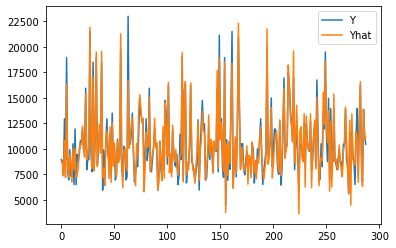

In [27]:
train_predict = train_model1.predict(test_x)
plt.plot(np.array(test_y), label='Y')
plt.plot(np.array(train_predict), label='Yhat')
plt.legend()
plt.show()

In [28]:
round(rawData.corr(),2)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Disel,Petrol
Id,1.00,-0.74,0.91,0.04,-0.92,0.27,-0.11,-0.08,0.07,-0.12,...,-0.09,-0.01,-0.14,-0.03,-0.14,-0.02,-0.01,0.16,-0.16,0.16
Price,-0.74,1.00,-0.88,-0.02,0.89,-0.57,0.31,0.11,0.03,0.13,...,0.06,-0.04,0.22,0.16,0.10,0.11,-0.04,-0.17,0.05,-0.04
Age_08_04,0.91,-0.88,1.00,-0.12,-0.98,0.51,-0.16,-0.11,0.03,-0.10,...,-0.07,0.01,-0.13,-0.11,-0.12,-0.04,0.01,0.19,-0.10,0.09
Mfg_Month,0.04,-0.02,-0.12,1.00,-0.06,-0.02,-0.04,0.03,0.01,0.04,...,-0.06,0.03,-0.03,0.05,0.02,0.02,0.03,-0.04,0.05,-0.05
Mfg_Year,-0.92,0.89,-0.98,-0.06,1.00,-0.50,0.16,0.10,-0.03,0.09,...,0.08,-0.02,0.13,0.10,0.11,0.04,-0.02,-0.18,0.09,-0.08
KM,0.27,-0.57,0.51,-0.02,-0.50,1.00,-0.33,-0.08,-0.08,0.10,...,0.01,0.01,-0.07,-0.04,-0.05,-0.01,0.02,0.08,0.40,-0.43
HP,-0.11,0.31,-0.16,-0.04,0.16,-0.33,1.00,0.06,0.01,0.04,...,0.05,0.02,0.21,-0.01,0.01,0.21,0.02,0.07,-0.53,0.49
Met_Color,-0.08,0.11,-0.11,0.03,0.10,-0.08,0.06,1.00,-0.02,0.03,...,0.09,0.07,0.02,0.00,0.04,0.05,0.07,0.15,-0.01,0.00
Automatic,0.07,0.03,0.03,0.01,-0.03,-0.08,0.01,-0.02,1.00,0.07,...,-0.00,-0.01,0.00,0.01,-0.02,-0.08,-0.01,0.02,-0.08,0.08
cc,-0.12,0.13,-0.10,0.04,0.09,0.10,0.04,0.03,0.07,1.00,...,0.03,-0.00,0.02,-0.04,-0.06,0.00,-0.00,0.00,0.33,-0.32


In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(rawData.corr(), annot=True)
plt.show()

In [ ]:
rawData.Fuel_Type.unique()

In [ ]:
# 이산형 자료 변경 
# one - hot encoding 
rawData[['Disel', 'Petrol']] = pd.get_dummies(rawData.Fuel_Type, drop_first=True)

In [ ]:
rawData.boxplot(column='Id', by='Price', figsize=(20,7))

In [ ]:
rawData.boxplot(column='Price', by='ABS', grid=True, figsize=(20,7))

In [ ]:
rawData.boxplot(column='Price', by='Mfg_Year', grid=True, figsize=(20,7))

In [ ]:
rawData.plot.scatter(x='Mfg_Year', y='Price', figsize=(20,7))

In [ ]:
rawData['Guarantee_Period'].unique()

In [ ]:
rawData.boxplot(column='Price', by='Guarantee_Period', figsize=(20,7))

In [ ]:
rawData['cc'].unique()

In [ ]:
rawData.boxplot(by='cc', column='Price', figsize=(20,7))

In [ ]:
rawData['Fuel_Type'].unique()

In [ ]:
rawData.boxplot(column='Price', by='Fuel_Type', figsize=(20,7))

In [ ]:
rawData['Automatic'].unique()

In [ ]:
rawData.boxplot(column='Price', by='Doors', figsize=(20,7))

In [ ]:
rawData.plot.scatter(y='Price', x='Automatic', figsize=(20,7))

In [ ]:
rawData.plot.scatter(y='Price', x='Sport_Model', figsize=(20,7))

In [ ]:
rawData.boxplot(column='Doors', by='Sport_Model', figsize=(20,7))

In [ ]:
rawData.boxplot(column='Price', by='KM', figsize=(20,7))
plt.show()

In [ ]:
rawData['KM'].unique()